In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Assignment_Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/Assignment_Test.csv')

# Display basic information
print("Training Data Info:")
print(train_data.info())
print("First few rows of Training Data:")
print(train_data.head())

print("\nTest Data Info:")
print(test_data.info())
print("First few rows of Test Data:")
print(test_data.head())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NA

In [37]:
# Print column names of the training and test datasets
print("Columns in Training Data:", train_data.columns)
print("Columns in Test Data:", test_data.columns)

Columns in Training Data: Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Soc

In [42]:
# Splitting data into features and target
X = train_data.drop(['Application Status'], axis=1)
y = train_data['Application Status']

# Remove 'Application Status' from the preprocessor's column list
for i, transformer in enumerate(preprocessor.transformers):
    if isinstance(transformer[2], list) and 'Application Status' in transformer[2]:
        preprocessor.transformers[i][2].remove('Application Status')

X_preprocessed = preprocessor.fit_transform(X)
X_test_preprocessed = preprocessor.transform(test_data)  # Do not drop 'Application Status' here

# Splitting the preprocessed data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluating the model
y_pred = rf_classifier.predict(X_val)
print("Accuracy on Validation Set:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Predicting on the test set
test_predictions = rf_classifier.predict(X_test_preprocessed)

output = pd.DataFrame({'UID': test_data['UID'], 'Application Status': test_predictions})
output.to_csv('/content/drive/MyDrive/Datasets/Loan_Application_Predictions.csv', index=False)

print("Predictions for the test set saved successfully.")

Accuracy on Validation Set: 0.83
Classification Report:
               precision    recall  f1-score   support

    APPROVED       0.98      0.76      0.86      1327
    DECLINED       0.67      0.97      0.79       673

    accuracy                           0.83      2000
   macro avg       0.83      0.87      0.82      2000
weighted avg       0.88      0.83      0.83      2000

Predictions for the test set saved successfully.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Assignment_Train.csv')

# Define label encoder, imputers, and scaler
label_encoder = LabelEncoder()
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
scaler = MinMaxScaler()

# Prepare the feature matrix and target vector
X = train_data.drop(['Application Status'], axis=1)  # Drop the target variable
y = label_encoder.fit_transform(train_data['Application Status'])  # Encode the target variable

# Preprocess the data: Impute, Encode, and Scale
for column in X.columns:
    if X[column].dtype == 'object':  # Handling categorical data
        X[column] = X[column].astype(str)  # Convert column to string type
        imputed_data = cat_imputer.fit_transform(X[column].values.reshape(-1, 1))
        X[column] = label_encoder.fit_transform(imputed_data.ravel())  # Flatten the 2D array to 1D before encoding
    else:  # Handling numerical data
        X[column] = X[column].astype(float)  # Ensure numerical data is float type
        X[column] = num_imputer.fit_transform(X[column].values.reshape(-1, 1))
        X[column] = scaler.fit_transform(X[column].values.reshape(-1, 1))

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (8000, 54)
Validation data shape: (2000, 54)


In [28]:
from sklearn.model_selection import train_test_split

# Use the existing feature matrix X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have a model already trained, you'd get predictions like this:
predictions = best_rf_classifier.predict(X_test)

# Now you can use y_test and predictions to compute metrics

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

accuracy, classification_rep

(0.8805,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.91      0.91      1327\n           1       0.82      0.82      0.82       673\n\n    accuracy                           0.88      2000\n   macro avg       0.87      0.87      0.87      2000\nweighted avg       0.88      0.88      0.88      2000\n')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit GridSearch to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score achieved: ", grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score achieved:  0.8847496369780484


In [ ]:
# Assuming rf_classifier is a Random Forest model fitted with the best parameters found from Grid Search
best_rf_classifier = grid_search.best_estimator_

# Get feature importances
importances = best_rf_classifier.feature_importances_

# Summarize feature importances in a DataFrame
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display
print(feature_importances.head())

                feature  importance
9           Cibil Score    0.161850
24  EMPLOY CONSTITUTION    0.104209
26        EMPLOYER TYPE    0.098030
13            ASSET CTG    0.086411
19       MARITAL STATUS    0.085756


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the test data
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/Assignment_Test.csv')

# Define imputers and scaler
num_imputer = SimpleImputer(strategy='median', fill_value=0)  # Using fill_value for numerical columns
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')  # Using constant strategy for categorical
scaler = MinMaxScaler()

# Assume label_encoders are properly set up and loaded from training phase
# label_encoders = {column: LabelEncoder() for column in train_data.columns if train_data[column].dtype == 'object'}

def preprocess_data(data):
    for column in data.columns:
        if data[column].dtype == 'object' or isinstance(data[column].dtype, str):  # Handling categorical columns
            # Convert to string, reshape, impute missing values, and encode
            transformed_data = cat_imputer.fit_transform(data[column].astype(str).values.reshape(-1, 1))
            transformed_data = transformed_data.ravel()  # Flatten the array correctly
            # Use the LabelEncoder for this column if it exists
            if column in label_encoders:
                data[column] = label_encoders[column].transform(transformed_data)
            else:
                data[column] = transformed_data  # This case shouldn't happen; it's just in case
        else:  # Handling numerical columns
            if data[column].isna().all():
                data[column] = pd.Series([0]*len(data))  # Replace all NaNs with 0 if the entire column is NaN
            else:
                transformed_data = num_imputer.fit_transform(data[column].values.reshape(-1, 1))
                data[column] = scaler.fit_transform(transformed_data).ravel()  # Reshape for scaling and flatten afterwards
    return data

# Preprocess the test data
X_test = preprocess_data(test_data.copy())

In [ ]:
# Load your test data (reloading if necessary)
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/Assignment_Test.csv')

# Print out the column names
print("Columns in the dataset:", test_data.columns)

# Optionally, you can also display the first few rows to check the data format
print(test_data.head())

Columns in the dataset: Index(['UID', 'DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phon

In [ ]:
if 'Date' in test_data.columns:  # Only process if 'Date' exists
    test_data['Date'] = pd.to_datetime(test_data['Date'], format='%d/%m/%y')
    test_data['Year'] = test_data['Date'].dt.year
    test_data['Month'] = test_data['Date'].dt.month
    test_data['Day'] = test_data['Date'].dt.day
    test_data.drop('Date', axis=1, inplace=True)
else:
    print("No 'Date' column found. Proceeding without date processing.")

# Ensure the column names match the trained model's features
train_columns = list(best_rf_classifier.feature_names_in_)
X_test = test_data.reindex(columns=train_columns).fillna(0)  # Fill missing with defaults

# Predict using the trained model
predictions = best_rf_classifier.predict(X_test)

# Save or output predictions
output = pd.DataFrame({'Application_ID': test_data['Application_ID'], 'Predicted_Status': predictions})
output.to_csv('/content/drive/MyDrive/Datasets/Assignment_Predictions.csv', index=False)

print("Predictions saved successfully.")

Predictions saved successfully.


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, predictions, average='binary')
f1 = f1_score(y_test, predictions, average='binary')
roc_auc = roc_auc_score(y_test, predictions)  # This requires the probabilities rather than binary predictions if you want to use it

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8865
Precision: 0.8358433734939759
Recall: 0.8246656760772659
F1 Score: 0.8302169035153327
ROC AUC Score: 0.8712627551448877
Confusion Matrix:
 [[1218  109]
 [ 118  555]]


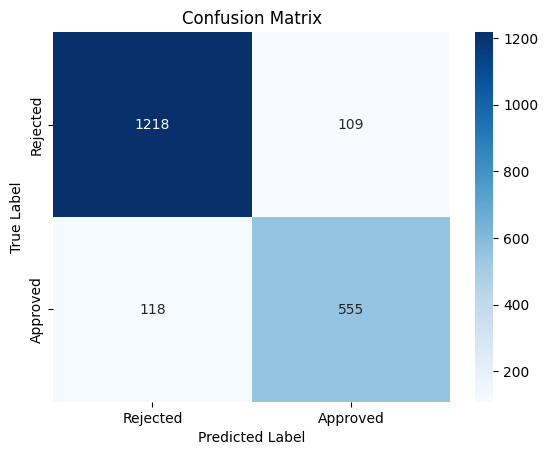

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

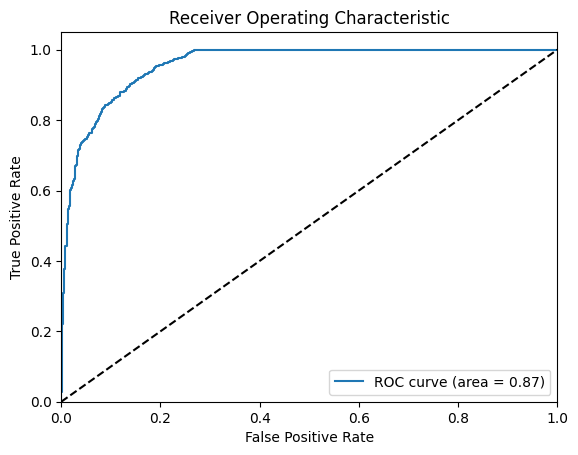

In [32]:
from sklearn.metrics import roc_curve

# Calculate probabilities for the positive class (assuming class 1 is positive)
prob_predictions = best_rf_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, prob_predictions)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()